In [1]:
import pandas as pd
from num_cat_transformers import PreprocessingPipeline
import seaborn as sns
import matplotlib.pyplot as plt
from lazy_predict_runner import LazyPredictPipeline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/Users/annabzinkowska/DTU/master_thesis/data/processed_labeled_data.csv')

In [3]:
df.head()

,product_id,description,month_mode,quarter_mode,year_mode,day_week_mode,quantity_sum,price_sum,unit_weight,customer_country_mode,customer_country_count,customer_id_count,category,unit_price_mean,description_original
0,220181,box filter bag,2,1,2015,0,13593,10786.03,0.01,SE,2,2,C,0.79,F1-1-30C (50/BOX) FILTER ...
1,22340174,ring nbr,3,1,2015,1,124881,22280.90,0.01,CN,32,44,B,0.18,O-RING NBR ...
2,22340175,ring nbr,1,1,2015,3,105817,34000.20,0.01,CN,25,34,B,0.32,O-RING NBR ...
3,22340421,ring nbr,3,1,2022,0,259094,9307.02,0.00,CN,27,38,B,0.04,O-RING NBR ...
4,22340433,ring nbr,1,1,2014,1,27196,13436.07,0.00,SE,10,13,B,0.49,O-RING NBR ...


In [4]:
# 'category' column value count
df['category'].value_counts()

category
A    147
B     70
C     39
D      1
Name: count, dtype: int64

In [14]:
# matrixc f0rm both numerical and categorical features
corr_matrix = df[['quantity_sum', 'price_sum', 'unit_weight', 'unit_price_mean', 'customer_country_count', 'customer_id_count']].corr()

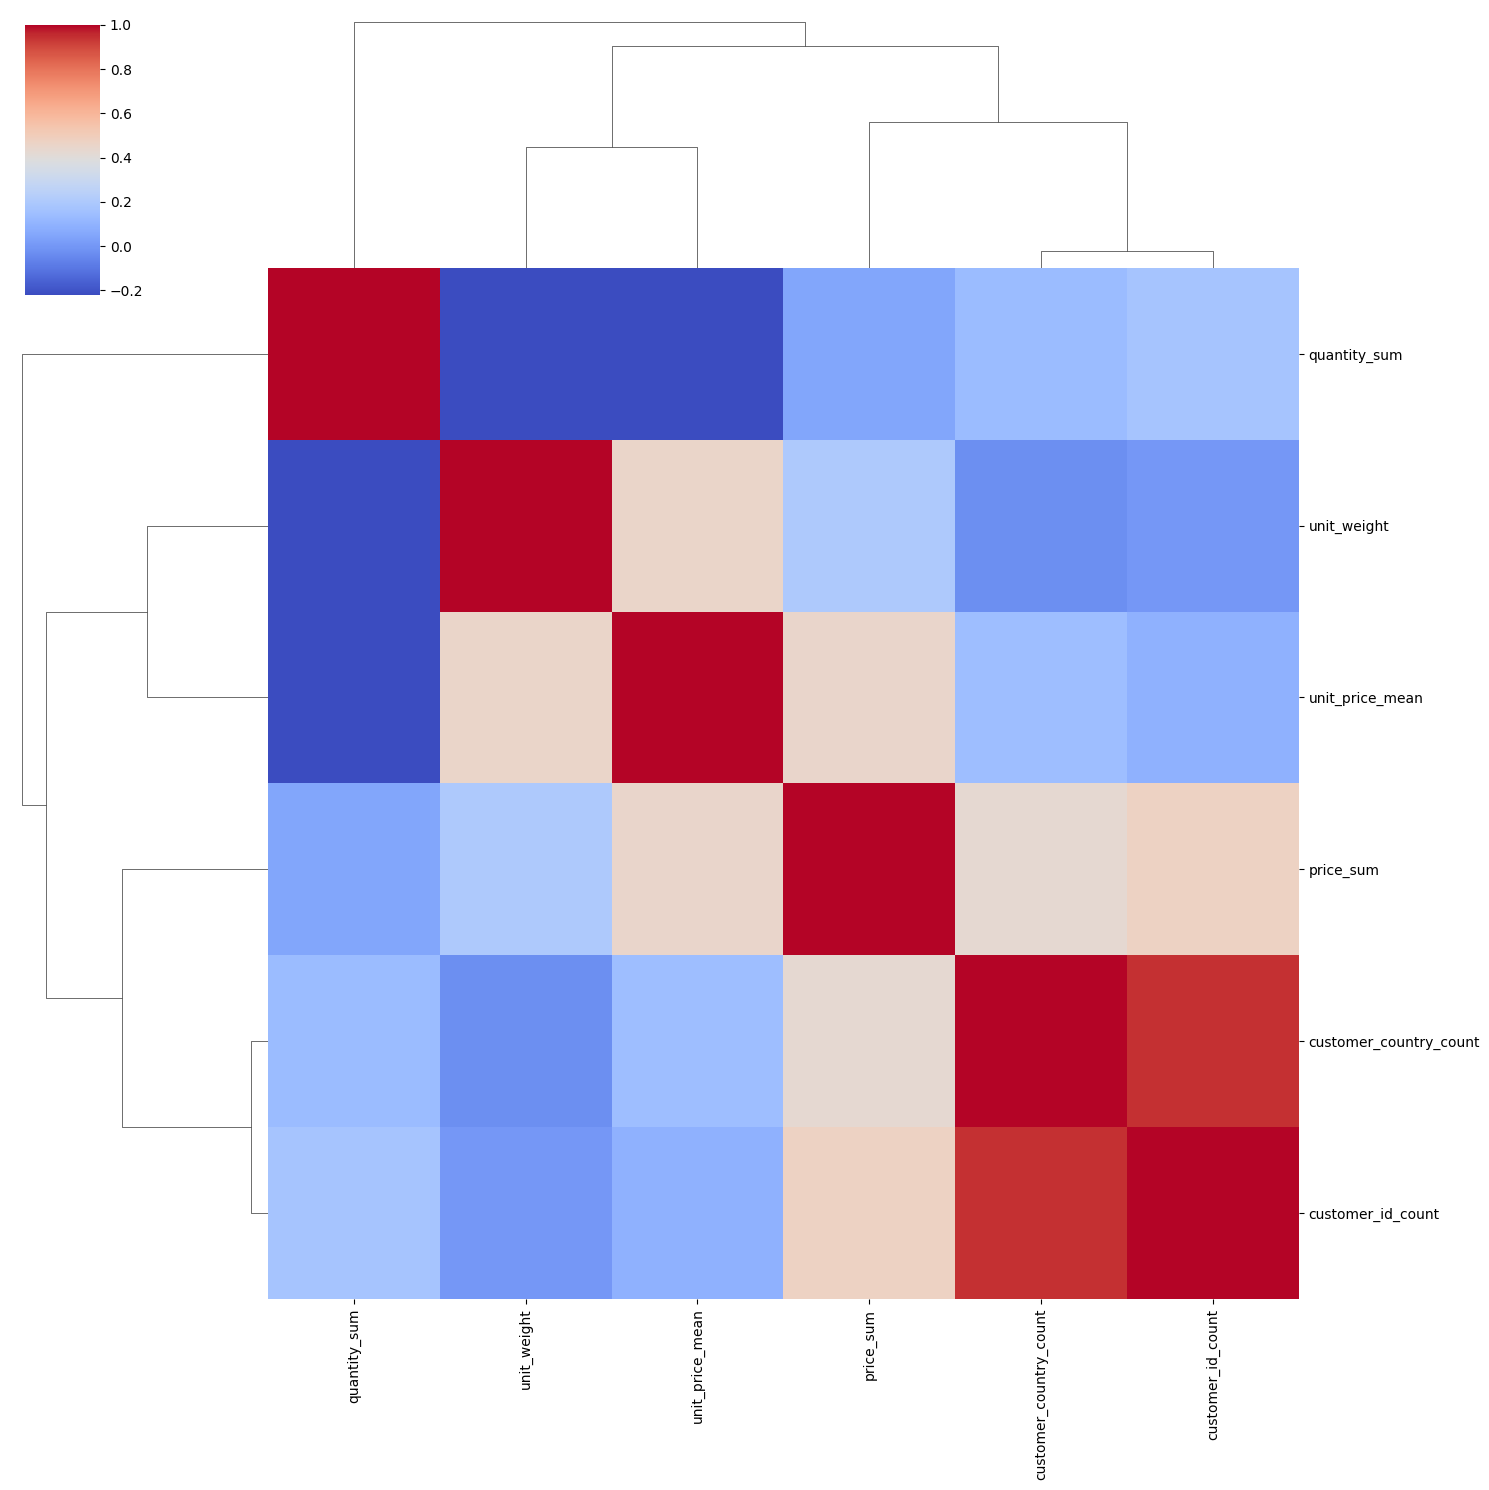

In [15]:
sns.clustermap(corr_matrix, method='average', cmap='coolwarm', figsize=(15, 15))
plt.show()

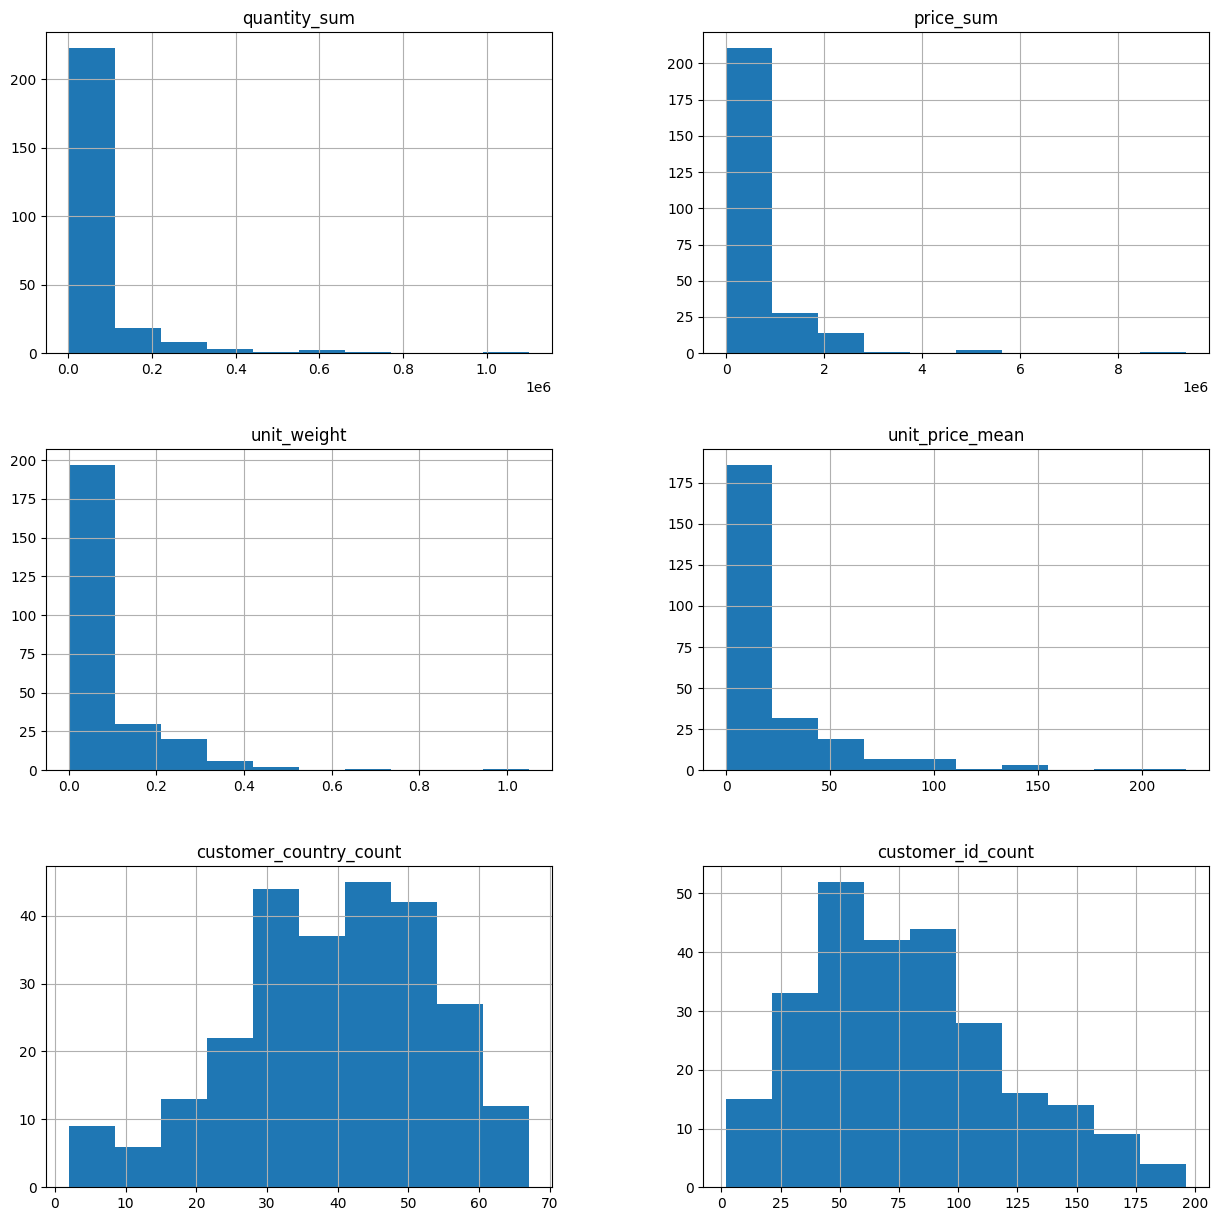

In [17]:
# historgrams of numerical features
df[['quantity_sum', 'price_sum', 'unit_weight', 'unit_price_mean', 'customer_country_count', 'customer_id_count']].hist(figsize=(15, 15))
plt.show()

In [ ]:
categorical_columns = ['month_mode', 'year_mode', 'quarter_mode', 'day_week_mode', 'customer_country_mode']
# only standard scaler for numerical columns
numerical_columns = ['customer_country_count', 'customer_id_count']
# numerical columns with log transformation and standard scaler
log_transform_columns = ['quantity_sum', 'price_sum', 'unit_weight', 'unit_price_mean']

In [9]:
# Run LazyPredict
lazy_pipeline = LazyPredictPipeline(df, 'category', categorical_columns, numerical_columns, log_transform_columns)
models, predictions = lazy_pipeline.run()

 83%|████████▎ | 24/29 [00:01<00:00, 15.80it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002374 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 404
[LightGBM] [Info] Number of data points in the train set: 205, number of used features: 21
[LightGBM] [Info] Start training from score -0.535518
[LightGBM] [Info] Start training from score -1.297658
[LightGBM] [Info] Start training from score -1.955714
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

100%|██████████| 29/29 [00:01<00:00, 16.06it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001225 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 319
[LightGBM] [Info] Number of data points in the train set: 164, number of used features: 18
[LightGBM] [Info] Start training from score -0.535518
[LightGBM] [Info] Start training from score -1.315677
[LightGBM] [Info] Start training from score -1.921813
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

In [10]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken,Cross_Val_Score
Model,,,,,,
AdaBoostClassifier,0.77,0.49,None,0.71,0.05,0.70
RandomForestClassifier,0.73,0.45,None,0.66,0.11,0.79
LGBMClassifier,0.73,0.45,None,0.66,0.44,0.78
BaggingClassifier,0.71,0.44,None,0.66,0.01,0.73
ExtraTreeClassifier,0.67,0.44,None,0.63,0.00,0.68
BernoulliNB,0.67,0.43,None,0.65,0.00,0.75
ExtraTreesClassifier,0.69,0.43,None,0.64,0.04,0.72
NearestCentroid,0.65,0.42,None,0.64,0.03,0.72
KNeighborsClassifier,0.67,0.41,None,0.60,0.08,0.78
